### Author: Andrés Felipe Sánchez Arias
Date: Jun-03-2024
Last actualization: Jun-04-2024

#### Detecting Diabetes caused by Obesity

This Jupyter notebook aims to explore the relationship between Body Mass Index (BMI) categories and diabetes prevalence within a given dataset. 

It begins by categorizing individuals into distinct BMI categories based on their BMI values, ranging from "Underweight" to "Obese Class III". Subsequently, it calculates the total number of diabetes cases within each BMI category and the overall count of individuals represented in each category. 

This analysis provides valuable insights into how BMI levels correlate with the prevalence of diabetes, offering a visual representation through a bar chart. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('../'))

In [2]:
input_csv = '../datasets/diabetes.csv'

In [3]:
data = pd.read_csv(input_csv)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Underweight: 0 diabetes cases out of 4 total recorded data
Normal: 7 diabetes cases out of 108 total recorded data
Overweight: 44 diabetes cases out of 180 total recorded data
Obese Class I: 100 diabetes cases out of 221 total recorded data
Obese Class II: 61 diabetes cases out of 148 total recorded data
Obese Class III: 54 diabetes cases out of 96 total recorded data


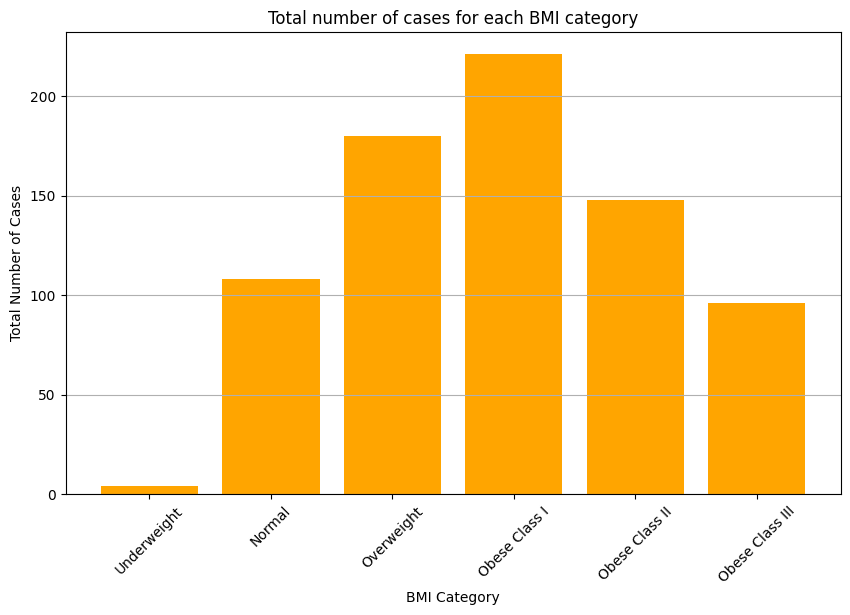

In [5]:
# Define BMI bins and labels to categorize individuals
bmi_bins = [0, 18.5, 25, 30, 35, 40, 100]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese Class I", "Obese Class II", "Obese Class III"]

# Categorize individuals based on their BMI into distinct BMI categories
data["BMI_Category"] = pd.cut(data["BMI"], bins=bmi_bins, labels=bmi_labels)

# Initialize dictionaries to store diabetes cases and total cases for each BMI category
bmi_diabetes_cases = {}
bmi_total_cases = {}

# Iterate over each BMI category label
for label in bmi_labels:
    # Filter the dataset to subset individuals belonging to the current BMI category
    subset_df = data[data["BMI_Category"] == label]
    
    # Count the number of diabetes cases within the current BMI category
    bmi_diabetes_cases[label] = len(subset_df[subset_df["Outcome"] == 1])
    
    # Count the total number of individuals represented in the current BMI category
    bmi_total_cases[label] = len(subset_df)

# Display the number of diabetes cases and total recorded data for each BMI category
for label in bmi_labels:
    print("{}: {} diabetes cases out of {} total recorded data".format(label, bmi_diabetes_cases[label], bmi_total_cases[label]))

# Visualize the results using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(bmi_diabetes_cases.keys(), bmi_total_cases.values(), color="orange")
plt.title("Total number of cases for each BMI category")
plt.xlabel("BMI Category")
plt.ylabel("Total Number of Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
